<a href="https://colab.research.google.com/github/dongyoon9802/pythonAnalasys/blob/main/pyhtonAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

처음 목적은 각종 경제지표들을 통해 부동산 가격의 흐름을 파악하고 각 경제지표들과 부동산가격이 어떠한 상관관계를 가지고 있는지 파악하는 것이었으나 조사를 진행하면서 너무 뻔한 내용으로 채워지는 것 같다는 생각에 방향을 전환하였습니다. 부동산 데이터를 그대로 조사하는 것은 맞으나 부동산 가격의 흐름을 예측하는 것이 아닌 지역별 부동산 가격에 사람들의 건강 상태나 의료시설들이 영향을 끼치는지 여부를 확인하고 인구구성도 영향을 끼치는 요인 중에 하나인지 파악하는 것으로 방향을 전환하였습니다.

우선 수집한 데이터들을 모두 정리해보면 아파트 평균 및 중위 매매와 전세 가격데이터를 수집하였으며 시·군·구별_비만율_자가보고 데이터와 시군구별_표시과목별_의원_현황 데이터, 시도별_공공의료기관_비중 데이터, 지역별_사고발생_인명피해_현황_부상 데이터,지역별_사고발생_인명피해_현황_사망데이터,
시군구별_미분양 데이터,
시도별_1인당_개인소득 데이터,
지역별_다문화_혼인 데이터,
지역별_층수_현황 데이터,
행정구역_주민등록인구 데이터,
등을 수집하였습니다.

위의 데이터들을 수집한 이유는 기존에 교통시설과 학군 및 상권등의 데이터 만으로 부동산 가격과의 상관관계를 파악하는 것은 너무나 뻔한 이야기가 될 것이라 판단이 되었고 다른 관점에서 접근하여 사고발생대비 사망률 데이터와 비만율, 다문화 가정비율, 인구구성비율 등의 정보를 통해 부동산 가격과의 상관관계를 파악해보고자 하였습니다.

In [8]:
from google.colab import drive
drive.mount('/content/drive')
mainlink = '/content/drive/MyDrive/SD/project' #datafile link
newlink  = '/content/drive/MyDrive/SD/project/pythonAnalysis'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np

아래에서 불러오는 파일은 금리 및 미분양 주택수, 전세가 지수 데이터를 가져오는 것입니다.

In [6]:
severalData = pd.read_csv(mainlink+'/복수통계_19193346.csv')

type(severalData)

pandas.core.frame.DataFrame

아파트 평균 및 중위 가격데이터를 가져옵니다.

이후 colums와 info() 및 head를 통해 데이터의 구성을 확인해봅니다. 



In [19]:
aptAvgPrice     = pd.read_csv(newlink+'/aptAvgPrice.csv'    ,encoding="cp949")
aptMidPrice     = pd.read_csv(newlink+'/aptMidPrice.csv'    ,encoding="cp949")
aptAvgRentPrice = pd.read_csv(newlink+'/aptAvgRentPrice.csv',encoding="cp949")
aptMidRentPrice = pd.read_csv(newlink+'/aptMidRentPrice.csv',encoding="cp949")


아파트의 매매 실거래가 평균 데이터를 확인해본 결과 1열은 지역을 나타내고 2열은 아파트의 규모를 나타낸다는 것을 알 수 있었습니다. 또한 데이터의 기간은 2014년부터 23년 3월까지의 데이터가 있다는 것을 알 수 있습니다. 
이제부터 데이터를 편집할텐데 편집할 데이터 목록은 일명 국민 평형이라고 불리는 중대형평수만남기고 나머지 평수의 데이터는 모두 제거할 것이며 전국 평균 아파트 가격 또한 불필요하다 판단되어 제거할 것입니다. 


In [23]:
aptAvgPrice.head()

,행정구역별(1),규모별(1),2014.01,2014.02,2014.03,2014.04,2014.05,2014.06,2014.07,2014.08,...,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2023.02,2023.03
0,전국,초소형(40㎡ 이하),278.7,281.7,251.6,254.7,256.5,264.4,289.9,294.0,...,351.6,332.9,346.4,330.2,332.9,316.9,345.0,386.7,427.2,397.3
1,전국,소형(40㎡초과 60㎡이하),302.3,301.2,285.8,277.4,278.4,282.8,294.0,311.9,...,350.6,332.3,335.6,329.1,319.2,354.4,381.6,452.4,497.7,476.1
2,전국,중소형(60㎡초과 85㎡이하),320.3,318.9,304.5,295.9,297.7,305.4,313.2,331.8,...,434.3,425.9,420.8,410.0,415.5,454.8,472.0,510.9,533.3,524.6
3,전국,중대형(85㎡초과 135㎡이하),349.6,345.0,331.9,321.7,326.0,336.2,347.9,363.2,...,554.1,513.7,518.9,493.6,501.6,524.4,544.6,563.0,603.6,599.0
4,전국,대형(135㎡ 초과),372.0,373.6,373.1,351.3,354.9,354.8,385.7,393.3,...,694.5,613.8,544.2,603.1,549.4,550.5,530.3,622.2,589.2,657.8


In [34]:
aptAvgPrice.columns


Index(['행정구역별(1)', '규모별(1)', '2014.01', '2014.02', '2014.03', '2014.04',
       '2014.05', '2014.06', '2014.07', '2014.08',
       ...
       '2022.06', '2022.07', '2022.08', '2022.09', '2022.10', '2022.11',
       '2022.12', '2023.01', '2023.02', '2023.03'],
      dtype='object', length=113)

In [35]:
aptAvgPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 113 entries, 행정구역별(1) to 2023.03
dtypes: float64(111), object(2)
memory usage: 17.8+ KB


float64형식의 데이터는 불필요하기때문에 16으로 사이즈를 줄였습니다.

In [70]:
#데이터 크기 줄이기
chgData = aptAvgPrice.select_dtypes(include='float64').columns
aptAvgPrice[chgData] = aptAvgPrice[chgData].astype('float16')
aptAvgPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 113 entries, 행정구역별(1) to 2023.03
dtypes: float16(111), object(2)
memory usage: 4.8+ KB


In [354]:
aptAvgPrice_edit = aptAvgPrice.drop(aptAvgPrice[aptAvgPrice['행정구역별(1)'].isin(['전국'])].index)
aptAvgPrice_edit = aptAvgPrice_edit.drop(aptAvgPrice_edit[aptAvgPrice_edit['규모별(1)'].isin(['초소형(40㎡ 이하)','소형(40㎡초과 60㎡이하)','중소형(60㎡초과 85㎡이하)','대형(135㎡ 초과)'])].index)
aptAvgPrice_edit = aptAvgPrice_edit[['행정구역별(1)','2021.03','2023.03']]
aptAvgPrice_edit

,행정구역별(1),2021.03,2023.03
8,서울,1314.0,1359.0
13,수도권,681.0,754.5
18,지방,337.5,436.0


In [358]:
aptAvgPrice_edit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 8 to 18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   행정구역별(1)  3 non-null      object 
 1   2021.03   3 non-null      float16
 2   2023.03   3 non-null      float16
dtypes: float16(2), object(1)
memory usage: 60.0+ bytes


In [ ]:
# aptAvgPrice['2014.01':'2023.03'].astype

In [24]:
aptMidPrice.head()

,행정구역별(1),규모별(1),2014.01,2014.02,2014.03,2014.04,2014.05,2014.06,2014.07,2014.08,...,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2023.02,2023.03
0,전국,초소형(40㎡ 이하),211.4,221.7,201.7,195.2,203.3,213.6,228.6,235.1,...,231.9,215.1,236.4,216.5,215.2,208.8,225.9,227.8,241.9,245.8
1,전국,소형(40㎡초과 60㎡이하),265.4,266.8,257.9,250.1,250.8,255.1,264.8,279.0,...,269.2,258.8,260.7,258.5,255.1,271.8,283.5,333.3,366.7,348.3
2,전국,중소형(60㎡초과 85㎡이하),283.2,280.5,275.3,268.4,270.6,275.4,279.2,291.9,...,357.7,350.9,352.7,349.6,358.9,394.2,411.8,441.3,460.0,447.0
3,전국,중대형(85㎡초과 135㎡이하),300.3,298.0,294.0,288.1,290.5,295.1,300.5,317.3,...,404.8,400.6,405.6,407.7,411.9,431.9,466.0,478.7,509.5,502.3
4,전국,대형(135㎡ 초과),280.4,277.6,278.9,281.6,280.8,275.9,291.8,296.2,...,427.2,421.4,396.4,389.9,364.1,402.6,398.4,473.6,459.7,477.6


In [71]:
#데이터 크기 줄이기
chgData = aptMidPrice.select_dtypes(include='float64').columns
aptMidPrice[chgData] = aptMidPrice[chgData].astype('float16')
aptMidPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 113 entries, 행정구역별(1) to 2023.03
dtypes: float16(111), object(2)
memory usage: 4.8+ KB


In [353]:
aptMidPrice_edit = aptMidPrice.drop(aptMidPrice[aptMidPrice['행정구역별(1)'].isin(['전국'])].index)
aptMidPrice_edit = aptMidPrice_edit.drop(aptMidPrice_edit[aptMidPrice_edit['규모별(1)'].isin(['초소형(40㎡ 이하)','소형(40㎡초과 60㎡이하)','중소형(60㎡초과 85㎡이하)','대형(135㎡ 초과)'])].index)
aptMidPrice_edit = aptMidPrice_edit[['행정구역별(1)','2021.03','2023.03']]
aptMidPrice_edit

,행정구역별(1),2021.03,2023.03
8,서울,1139.00,1174.0
13,수도권,561.00,603.0
18,지방,282.25,390.5


In [25]:
aptAvgRentPrice.head()

,행정구역별(1),규모별(1),2014.01,2014.02,2014.03,2014.04,2014.05,2014.06,2014.07,2014.08,...,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2023.02
0,전국,초소형(40㎡ 이하),238.8,220.8,220.6,227.3,230.2,233.5,245.8,247.1,...,528.5,528.3,525.6,519.4,514.1,512.9,517.8,511.1,511.0,500.2
1,전국,소형(40㎡초과 60㎡이하),252.3,251.7,246.6,246.2,249.5,251.9,257.1,259.5,...,456.7,459.5,463.8,459.9,461.5,450.5,434.0,443.9,434.7,434.0
2,전국,중소형(60㎡초과 85㎡이하),269.9,267.8,262.9,263.2,264.4,266.3,267.3,271.8,...,458.0,458.2,460.8,453.4,450.4,444.6,431.8,431.6,414.3,410.5
3,전국,중대형(85㎡초과 135㎡이하),268.7,273.1,265.5,266.6,268.2,269.3,269.5,272.5,...,504.9,506.5,506.9,502.1,502.5,497.5,487.5,479.7,455.1,443.1
4,전국,대형(135㎡ 초과),310.2,295.5,294.5,305.9,301.9,300.1,281.5,295.7,...,562.8,536.2,556.8,571.4,534.0,552.0,552.7,548.6,506.3,515.5


In [28]:
aptAvgRentPrice.columns

Index(['행정구역별(1)', '규모별(1)', '2014.01', '2014.02', '2014.03', '2014.04',
       '2014.05', '2014.06', '2014.07', '2014.08',
       ...
       '2022.05', '2022.06', '2022.07', '2022.08', '2022.09', '2022.10',
       '2022.11', '2022.12', '2023.01', '2023.02'],
      dtype='object', length=112)

In [72]:
#데이터 크기 줄이기
chgData = aptAvgRentPrice.select_dtypes(include='float64').columns
aptAvgRentPrice[chgData] = aptAvgRentPrice[chgData].astype('float16')
aptAvgRentPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 112 entries, 행정구역별(1) to 2023.02
dtypes: float16(110), object(2)
memory usage: 4.7+ KB


In [384]:
aptAvgRentPrice_edit = aptAvgRentPrice.drop(aptAvgRentPrice[aptAvgRentPrice['행정구역별(1)'].isin(['전국'])].index)
aptAvgRentPrice_edit = aptAvgRentPrice_edit.drop(aptAvgRentPrice_edit[aptAvgRentPrice_edit['규모별(1)'].isin(['초소형(40㎡ 이하)','소형(40㎡초과 60㎡이하)','중소형(60㎡초과 85㎡이하)','대형(135㎡ 초과)'])].index)
aptAvgRentPrice_edit = aptAvgRentPrice_edit[['행정구역별(1)','2021.03','2023.01']]
aptAvgRentPrice_edit

,행정구역별(1),2021.03,2023.01
8,서울,701.00,719.0
13,수도권,531.00,517.0
18,지방,308.25,298.0


In [26]:
aptMidRentPrice.head()

,행정구역별(1),규모별(1),2014.01,2014.02,2014.03,2014.04,2014.05,2014.06,2014.07,2014.08,...,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2023.02
0,전국,초소형(40㎡ 이하),205.1,181.9,183.5,190.0,188.8,192.6,208.9,201.7,...,448.3,453.3,454.8,440.1,447.3,442.6,456.1,439.8,435.9,426.7
1,전국,소형(40㎡초과 60㎡이하),227.3,233.4,225.2,225.7,232.3,233.0,233.6,235.8,...,400.7,401.7,404.1,400.5,403.3,390.0,379.3,376.8,367.8,370.4
2,전국,중소형(60㎡초과 85㎡이하),237.1,239.5,235.7,235.6,235.7,235.6,235.7,240.1,...,400.3,400.3,398.7,390.0,388.3,376.6,355.9,354.6,353.0,353.0
3,전국,중대형(85㎡초과 135㎡이하),239.0,244.1,233.8,236.9,237.1,239.2,240.3,240.2,...,430.3,434.6,431.9,423.6,422.3,418.1,408.5,408.2,389.6,387.6
4,전국,대형(135㎡ 초과),270.4,249.7,238.2,250.6,251.7,253.0,236.4,251.3,...,449.3,426.2,430.2,443.1,413.8,422.8,435.3,436.8,395.8,424.0


In [29]:
aptMidRentPrice.columns

Index(['행정구역별(1)', '규모별(1)', '2014.01', '2014.02', '2014.03', '2014.04',
       '2014.05', '2014.06', '2014.07', '2014.08',
       ...
       '2022.05', '2022.06', '2022.07', '2022.08', '2022.09', '2022.10',
       '2022.11', '2022.12', '2023.01', '2023.02'],
      dtype='object', length=112)

In [73]:
#데이터 크기 줄이기
chgData = aptMidRentPrice.select_dtypes(include='float64').columns
aptMidRentPrice[chgData] = aptMidRentPrice[chgData].astype('float16')
aptMidRentPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 112 entries, 행정구역별(1) to 2023.02
dtypes: float16(110), object(2)
memory usage: 4.7+ KB


In [357]:
aptMidRentPrice_edit = aptMidRentPrice.drop(aptMidRentPrice[aptMidRentPrice['행정구역별(1)'].isin(['전국'])].index)
aptMidRentPrice_edit = aptMidRentPrice_edit.drop(aptMidRentPrice_edit[aptMidRentPrice_edit['규모별(1)'].isin(['초소형(40㎡ 이하)','소형(40㎡초과 60㎡이하)','중소형(60㎡초과 85㎡이하)','대형(135㎡ 초과)'])].index)
aptMidRentPrice_edit = aptMidRentPrice_edit[['행정구역별(1)','2021.03','2023.01']]
aptMidRentPrice_edit

,행정구역별(1),2021.03,2023.01
8,서울,628.0,651.00
13,수도권,472.0,447.25
18,지방,300.5,285.25


na 값의 유무여부를 확인한 결과 존재하지 않음을 확인하였습니다.

In [343]:
print("아파트 중위 매매 실거래가 :"+str(aptMidPrice_edit.isna().sum().sum()))
print("아파트 평균 매매 실거래가 :"+str(aptAvgPrice_edit.isna().sum().sum()))
print("아파트 중위 전세 실거래가 :"+str(aptMidRentPrice_edit.isna().sum().sum()))
print("아파트 평균 전세 실거래가 :"+str(aptAvgRentPrice_edit.isna().sum().sum()))

아파트 중위 매매 실거래가 :0
아파트 평균 매매 실거래가 :0
아파트 중위 전세 실거래가 :0
아파트 평균 전세 실거래가 :0


In [148]:
obesityData      = pd.read_csv(newlink+'/시·군·구별_비만율_자가보고.csv'        ,encoding="cp949")
# cancerData       = pd.read_csv(newlink+'/시군구별_성별_위암검진_결과_판정_현황.csv',encoding="cp949")
hospitalData     = pd.read_csv(newlink+'/시군구별_표시과목별_의원_현황.csv'      ,encoding="cp949")
publicHealthData = pd.read_csv(newlink+'/시도별_공공의료기관_비중.csv'          ,encoding="cp949")
injuredData      = pd.read_csv(newlink+'/지역별_사고발생_인명피해_현황_부상.csv'  ,encoding="cp949")
deathData        = pd.read_csv(newlink+'/지역별_사고발생_인명피해_현황_사망.csv'  ,encoding="cp949")
unsoldData       = pd.read_csv(newlink+'/시군구별_미분양.csv'                 ,encoding="cp949")
gdpPData         = pd.read_csv(newlink+'/시도별_1인당_개인소득.csv'            ,encoding="cp949")
foreignerData    = pd.read_csv(newlink+'/지역별_다문화_혼인.csv'               ,encoding="cp949")
heightData       = pd.read_csv(newlink+'/지역별_층수_현황.csv'                ,encoding="cp949")
populationData   = pd.read_csv(newlink+'/행정구역_주민등록인구.csv'             ,encoding="cp949")

시·군·구별_비만율_자가보고 데이터의 구성을 본결과 지역이 매우 세부적으로 나눠져있습니다. 따라서 가장 넓은 범위에서 어느지역부터 어느 지역까지 데이터로 기록되어 있는지 확인해봅니다. 이 때 결측치도 함께 확인합니다. 
이 데이터를 선정한 이유는 실제 하버드와 조지워싱턴대학 연구진이 수행해 '뉴 잉글랜드 저널 오브 메디신'에 기고한 자료에 따른면 저소득층일수록 비만율이 높다는 결과가 있었기에 부동산가격과도 관계가 있지 않을까 하는 추측으로 선정하였습니다.


In [39]:
obesityData.head()


,시군구별(1),시군구별(2),시군구별(3),2021,2021.1,2021.2,2021.3,2021.4
283,제주특별자치도,서귀포시,서부,755,37.8,2.1,37.9,2.0
284,제주특별자치도,제주시,소계,2500,34.9,1.4,35.8,1.4
285,제주특별자치도,제주시,제주,850,35.3,1.8,36.2,1.8
286,제주특별자치도,제주시,동부,824,34.5,1.8,35.9,2.0
287,제주특별자치도,제주시,서부,826,33.0,2.0,33.2,2.2


In [44]:
obesityData.drop_duplicates(subset='시군구별(1)',keep='last')['시군구별(1)']

0      시군구별(1)
26       서울특별시
43       부산광역시
52       대구광역시
63       인천광역시
69       광주광역시
75       대전광역시
81       울산광역시
83     세종특별자치시
139        경기도
158        강원도
174       충청북도
190       충청남도
205       전라북도
228       전라남도
256       경상북도
278       경상남도
287    제주특별자치도
Name: 시군구별(1), dtype: object

확인결과 float형식의 데이터가 존재하지 않는다 따라서 이유를 알기위해 2021부터 2021.4까지의 데이터를 확인해본 결과 2번째 행에 존재하는 데이터들 중 문자열들이 존재해서 그런 것으로 확인되었다. 

In [82]:
obesityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   시군구별(1)  288 non-null    object
 1   시군구별(2)  288 non-null    object
 2   시군구별(3)  288 non-null    object
 3   2021     288 non-null    object
 4   2021.1   288 non-null    object
 5   2021.2   288 non-null    object
 6   2021.3   288 non-null    object
 7   2021.4   288 non-null    object
dtypes: object(8)
memory usage: 18.1+ KB


In [81]:
obesityData[['2021', '2021.1','2021.2','2021.3','2021.4']]


,2021,2021.1,2021.2,2021.3,2021.4
0,응답자수 (명),조율 (%),조율표준오차,표준화율 (%),표준화율표준오차
1,22751,28.6,0.3,29.2,0.3
2,922,22.5,1.3,23.9,1.4
3,917,27.1,1.3,27.9,1.5
4,897,32.3,1.7,32.1,1.8
...,...,...,...,...,...
283,755,37.8,2.1,37.9,2.0
284,2500,34.9,1.4,35.8,1.4
285,850,35.3,1.8,36.2,1.8
286,824,34.5,1.8,35.9,2.0


실제 분석에 사용할 데이터는 조율 column만 사용할 것이므로 2번째 행과 조율column을 제외한 나머지 column을 제거해준다.

In [150]:
# obesityData.drop([0],inplace = True)
obesityData_=obesityData.drop(['2021','2021.2','2021.3','2021.4'],axis = 1).rename(columns={'2021.1':'obesity'})
obesityData_

,시군구별(1),시군구별(2),시군구별(3),obesity
0,시군구별(1),시군구별(2),시군구별(3),조율 (%)
1,서울특별시,소계,소계,28.6
2,서울특별시,강남구,소계,22.5
3,서울특별시,강동구,소계,27.1
4,서울특별시,강북구,소계,32.3
...,...,...,...,...
283,제주특별자치도,서귀포시,서부,37.8
284,제주특별자치도,제주시,소계,34.9
285,제주특별자치도,제주시,제주,35.3
286,제주특별자치도,제주시,동부,34.5


object형식의 데이터를 float16으로 변환

In [96]:
obesityData['2021.1'] = obesityData['2021.1'].astype('float16')
obesityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 1 to 287
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군구별(1)  287 non-null    object 
 1   시군구별(2)  287 non-null    object 
 2   시군구별(3)  287 non-null    object 
 3   2021.1   287 non-null    float16
dtypes: float16(1), object(3)
memory usage: 7.4+ KB


시군구별_표시과목별_의원_현황 데이터는 지역별로 진료과목별 병원의 수를 나타내는 데이터입니다. 이 데이터를 사용하려는 이유는 집값이 비싼 지역일수록 소득이 높을 것이기 때문에 자기관리에 대한 수요가 높을 것이라 예상하여 사용하고자 하였습니다.

다만 해당 데이터의 경우 각지역이 서울과 경기 부산 등 포괄적으로만 분류되어 있고 세부적으로 동과 구 단위로는 나눠져 있지 않아 집값의 편차가 큰 서울지역과 경기도의 경우 유의미한 결과를 얻을 수 있을지 우려가 되는 부분입니다.


In [52]:
hospitalData.head()

,시군구별(1),2022.4/4,2022.4/4.1,2022.4/4.2,2022.4/4.3,2022.4/4.4,2022.4/4.5,2022.4/4.6,2022.4/4.7,2022.4/4.8,...,2022.4/4.19,2022.4/4.20,2022.4/4.21,2022.4/4.22,2022.4/4.23,2022.4/4.24,2022.4/4.25,2022.4/4.26,2022.4/4.27,2022.4/4.28
0,시군구별(1),계,내과,신경과,정신건강의학과,외과,정형외과,신경외과,흉부외과,성형외과,...,진단검사의학과,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과,전문과목미표시전문의,일반의
1,전체,34958,5286,276,1513,1037,2491,569,58,1138,...,10,1,493,1,858,0,1,1,6277,3165
2,서울,9467,1221,50,534,223,631,107,11,624,...,4,0,170,0,206,0,0,0,1743,785
3,경기,7829,1193,40,313,229,629,128,9,107,...,2,1,110,0,186,0,0,1,1422,616
4,부산,2562,432,22,137,64,173,42,9,100,...,0,0,28,1,40,0,0,0,402,242


In [53]:
hospitalData['시군구별(1)']

0     시군구별(1)
1          전체
2          서울
3          경기
4          부산
5          대구
6          광주
7          인천
8          경남
9          대전
10         전북
11         경북
12         충북
13         충남
14         전남
15         울산
16         강원
17         제주
18         세종
Name: 시군구별(1), dtype: object

이 역시 float형식으로 있어야 할 데이터들이 objrct형식으로 있는 것을 알 수 있습니다. 따라서 데이터 형식을 변환시키고 실제로 사용할 데이터 column만 남겨두는 작업을 진행합니다.

In [97]:
hospitalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   시군구별(1)      19 non-null     object
 1   2022.4/4     19 non-null     object
 2   2022.4/4.1   19 non-null     object
 3   2022.4/4.2   19 non-null     object
 4   2022.4/4.3   19 non-null     object
 5   2022.4/4.4   19 non-null     object
 6   2022.4/4.5   19 non-null     object
 7   2022.4/4.6   19 non-null     object
 8   2022.4/4.7   19 non-null     object
 9   2022.4/4.8   19 non-null     object
 10  2022.4/4.9   19 non-null     object
 11  2022.4/4.10  19 non-null     object
 12  2022.4/4.11  19 non-null     object
 13  2022.4/4.12  19 non-null     object
 14  2022.4/4.13  19 non-null     object
 15  2022.4/4.14  19 non-null     object
 16  2022.4/4.15  19 non-null     object
 17  2022.4/4.16  19 non-null     object
 18  2022.4/4.17  19 non-null     object
 19  2022.4/4.18  19 non-null     ob

In [172]:
hospitalData_edit = hospitalData[['시군구별(1)','2022.4/4','2022.4/4.10','2022.4/4.16']]
hospitalData_edit = hospitalData_edit.drop(0).rename(columns={'2022.4/4':'total','2022.4/4.10':'dermatology','2022.4/4.16':'plastic surgery'}).astype({'total':'int32','dermatology':'int32','plastic surgery':'int32'})
# hospitalData_edit.iloc[:,1:] = hospitalData_edit.iloc[:,1:].astype('float16').info()
hospitalData_edit.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 1 to 18
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   시군구별(1)          18 non-null     object
 1   total            18 non-null     int32 
 2   dermatology      18 non-null     int32 
 3   plastic surgery  18 non-null     int32 
dtypes: int32(3), object(1)
memory usage: 492.0+ bytes


공공의료원이 있는 지역일 수록 의료혜택을 받기 쉬울 것이기 때문에 실제 집값에도 영향을 끼치는 요인이 되지 않을까 하는 추측으로 선정한 데이터입니다. 이 또한 지역이 세부적으로 분할되어 있지 않아 상관관계를 파악하는데 여려움이 있을 것이라 걱정이 되지만 이보다 질 좋은 데이터가 없는 관계로 선정하였습니다.

In [54]:
publicHealthData.head()

,시도별(1),2021,2021.1,2021.2,2021.3,2021.4,2021.5
0,시도별(1),의료기관 수,의료기관 수,의료기관 수,병상 수,병상 수,병상 수
1,시도별(1),전체 의료기관 (개소),공공의료기관 (개소),공공의료기관 비중 (%),전체 의료기관 (개),공공의료기관 (개),공공의료기관 비중 (%)
2,전국,4188,221,5.3,660606,63547,9.6
3,서울,547,24,4.4,80590,8973,11.1
4,부산,399,9,2.3,66737,3621,5.4


In [55]:
publicHealthData['시도별(1)']

0     시도별(1)
1     시도별(1)
2         전국
3         서울
4         부산
5         대구
6         인천
7         광주
8         대전
9         울산
10        세종
11        경기
12        강원
13        충북
14        충남
15        전북
16        전남
17        경북
18        경남
19        제주
Name: 시도별(1), dtype: object

In [173]:
publicHealthData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도별(1)  20 non-null     object
 1   2021    20 non-null     object
 2   2021.1  20 non-null     object
 3   2021.2  20 non-null     object
 4   2021.3  20 non-null     object
 5   2021.4  20 non-null     object
 6   2021.5  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


이 또한 불필요한 데이터들을 제거한 후 데이터의 형식을 원래 형태로 변환하고 column의 이름을 수정해주는 작업을 진행하였습니다.

In [188]:
publicHealthData_edit = publicHealthData.drop(['2021.3',	'2021.4',	'2021.5'],axis=1)
publicHealthData_edit = publicHealthData_edit.drop([0,1]).rename(columns={'2021':'total hospital','2021.1':'public health','2021.2':'public health ratio'}).astype({'total hospital':'int32','public health':'int32','public health ratio':'float16'})
publicHealthData_edit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 2 to 19
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   시도별(1)               18 non-null     object 
 1   total hospital       18 non-null     int32  
 2   public health        18 non-null     int32  
 3   public health ratio  18 non-null     float16
dtypes: float16(1), int32(2), object(1)
memory usage: 456.0+ bytes


지역별_사고발생_인명피해_현황_부상 데이터와 지역별_사고발생_인명피해_현황_사망 데이터는 집값이 비싼 동네일수록 부상자 발생 수에 비해 사망자 수가 낮을 것이라는 추측으로 선정한 데이터입니다. 이는 의료시설들이 보다 많이 분포해 있을 것이라는 전제가 바탕이 되기 때문에 공공의료원의 분포 수가 실제로 다른 지역에 비해 많은지 확인 후 검증할 계획입니다.

In [56]:
injuredData.head()

,사고유형별(1),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12,2021.13,2021.14,2021.15,2021.16,2021.17
0,사고유형별(1),합계,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,합계,302375,46153,16428,17169,11840,11635,10221,5463,1130,80395,11021,12549,12682,9665,14142,18852,16106,6923
2,도로교통,291608,44911,15880,16848,11463,11407,10081,5171,1019,77790,10226,12190,12255,8928,13600,18065,15049,6725
3,화재,1854,280,138,61,65,19,40,63,15,425,141,94,55,80,65,188,106,19
4,산불,7,-,-,-,-,-,-,-,-,3,-,1,-,-,-,1,2,-


부상데이터 또한 object로 되어 있는 데이터를 정상적으로 int형으로 변환해주고 합계데이터를 제외한 모든 행 데이터를 제거한 후 column이름까지 수정해줍니다.


In [229]:
injuredData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   사고유형별(1)  27 non-null     object
 1   2021      27 non-null     object
 2   2021.1    27 non-null     object
 3   2021.2    27 non-null     object
 4   2021.3    27 non-null     object
 5   2021.4    27 non-null     object
 6   2021.5    27 non-null     object
 7   2021.6    27 non-null     object
 8   2021.7    27 non-null     object
 9   2021.8    27 non-null     object
 10  2021.9    27 non-null     object
 11  2021.10   27 non-null     object
 12  2021.11   27 non-null     object
 13  2021.12   27 non-null     object
 14  2021.13   27 non-null     object
 15  2021.14   27 non-null     object
 16  2021.15   27 non-null     object
 17  2021.16   27 non-null     object
 18  2021.17   27 non-null     object
dtypes: object(19)
memory usage: 4.1+ KB


In [230]:
injuredData_edit = injuredData[:2].drop(['2021'],axis=1)
injuredData_edit.columns = injuredData_edit.iloc[0]
injuredData_edit=injuredData_edit.drop(0,axis=0)
injuredData_edit=injuredData_edit.astype({'서울':'int32','부산':'int32','대구':'int32','인천':'int32','광주':'int32','대전':'int32','울산':'int32','세종':'int32','경기':'int32','강원':'int32','충북':'int32','충남':'int32','전북':'int32','전남':'int32','경북':'int32','경남':'int32','제주':'int32'})
injuredData_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 1 to 1
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   사고유형별(1)  1 non-null      object
 1   서울        1 non-null      int32 
 2   부산        1 non-null      int32 
 3   대구        1 non-null      int32 
 4   인천        1 non-null      int32 
 5   광주        1 non-null      int32 
 6   대전        1 non-null      int32 
 7   울산        1 non-null      int32 
 8   세종        1 non-null      int32 
 9   경기        1 non-null      int32 
 10  강원        1 non-null      int32 
 11  충북        1 non-null      int32 
 12  충남        1 non-null      int32 
 13  전북        1 non-null      int32 
 14  전남        1 non-null      int32 
 15  경북        1 non-null      int32 
 16  경남        1 non-null      int32 
 17  제주        1 non-null      int32 
dtypes: int32(17), object(1)
memory usage: 208.0+ bytes


In [57]:
deathData.head()

,사고유형별(1),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12,2021.13,2021.14,2021.15,2021.16,2021.17
0,사고유형별(1),합계,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,합계,3664,305,150,91,135,70,69,71,13,655,222,189,330,230,314,429,326,65
2,도로교통,2916,240,118,78,113,49,57,50,9,531,145,160,274,194,255,339,252,52
3,화재,276,37,16,5,10,8,6,5,-,66,19,11,17,10,21,21,21,3
4,산불,7,-,-,-,-,-,-,-,-,1,-,-,2,1,-,3,-,-


이 또한 데이터를 정리해줘야하는데 이에 앞서 사고 유형데이터는 필요없고 사고가 얼마나 많이 발생했는지에 대한 데이터만 필요하므로 해당 데이터만을 추출합니다.

In [189]:
deathData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   사고유형별(1)  28 non-null     object
 1   2021      28 non-null     object
 2   2021.1    28 non-null     object
 3   2021.2    28 non-null     object
 4   2021.3    28 non-null     object
 5   2021.4    28 non-null     object
 6   2021.5    28 non-null     object
 7   2021.6    28 non-null     object
 8   2021.7    28 non-null     object
 9   2021.8    28 non-null     object
 10  2021.9    28 non-null     object
 11  2021.10   28 non-null     object
 12  2021.11   28 non-null     object
 13  2021.12   28 non-null     object
 14  2021.13   28 non-null     object
 15  2021.14   28 non-null     object
 16  2021.15   28 non-null     object
 17  2021.16   28 non-null     object
 18  2021.17   28 non-null     object
dtypes: object(19)
memory usage: 4.3+ KB


In [228]:
deathData_edit = deathData[:2].drop(['2021'],axis=1)
deathData_edit.columns = deathData_edit.iloc[0]
deathData_edit=deathData_edit.drop(0,axis=0)
deathData_edit=deathData_edit.astype({'서울':'int32','부산':'int32','대구':'int32','인천':'int32','광주':'int32','대전':'int32','울산':'int32','세종':'int32','경기':'int32','강원':'int32','충북':'int32','충남':'int32','전북':'int32','전남':'int32','경북':'int32','경남':'int32','제주':'int32'})
deathData_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 1 to 1
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   사고유형별(1)  1 non-null      object
 1   서울        1 non-null      int32 
 2   부산        1 non-null      int32 
 3   대구        1 non-null      int32 
 4   인천        1 non-null      int32 
 5   광주        1 non-null      int32 
 6   대전        1 non-null      int32 
 7   울산        1 non-null      int32 
 8   세종        1 non-null      int32 
 9   경기        1 non-null      int32 
 10  강원        1 non-null      int32 
 11  충북        1 non-null      int32 
 12  충남        1 non-null      int32 
 13  전북        1 non-null      int32 
 14  전남        1 non-null      int32 
 15  경북        1 non-null      int32 
 16  경남        1 non-null      int32 
 17  제주        1 non-null      int32 
dtypes: int32(17), object(1)
memory usage: 208.0+ bytes


지역마다 미분양 물량이 많을수록 부동산 가격이 낮을 것이라 추측하여 선정한 데이터입니다. 지역구분이 세부적으로 이뤄져 있어서 유의미한 결과를 얻을 수 있을 것이라 기대합니다.

In [58]:
unsoldData.head()

,구분,시군구,항목,단위,2014.01 월,2014.02 월,2014.03 월,2014.04 월,2014.05 월,2014.06 월,...,2022.08 월,2022.09 월,2022.10 월,2022.11 월,2022.12 월,2023.01 월,2023.02 월,2023.03 월,2023.04 월,Unnamed: 116
0,서울,계,미분양현황,NaN,2905.0,2734.0,2259.0,2185.0,2241.0,2601.0,...,610.0,719.0,866.0,865.0,953.0,996.0,2099.0,1084.0,1058.0,NaN
1,서울,종로구,미분양현황,NaN,28.0,20.0,15.0,14.0,11.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,서울,강남구,미분양현황,NaN,1.0,1.0,1.0,0.0,43.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,서울,중구,미분양현황,NaN,27.0,27.0,27.0,12.0,11.0,9.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
4,서울,강동구,미분양현황,NaN,126.0,120.0,114.0,103.0,158.0,1019.0,...,32.0,32.0,32.0,32.0,32.0,32.0,1156.0,257.0,229.0,NaN


In [59]:
unsoldData.drop_duplicates(subset='구분',keep='last')['구분']

25     서울
42     부산
51     대구
63     인천
69     광주
75     대전
81     울산
114    경기
133    강원
146    충북
163    충남
178    전북
201    전남
225    경북
244    경남
247    제주
249    세종
Name: 구분, dtype: object

미분양데이터의 과거 데이터는 사실상 쓸 일이 없을 것으로 예상되어 21년도 데이터와 23년도 데이터만을 남기고 모두 제거합니다. 21년도 데이터를 남기는 이유는 위에서 추출한 사고데이터와 암, 비만 데이터가 21년도 기준이기 때문에 보다 정확한 분석을 위해 21년도 데이터를 남겨둡니다.


In [242]:
unsoldData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 117 entries, 구분 to Unnamed: 116
dtypes: float64(114), object(3)
memory usage: 228.6+ KB


In [245]:
unsoldData_edit = unsoldData[['구분','시군구','2021.12 월','2023.04 월']]
unsoldData_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   구분         250 non-null    object 
 1   시군구        250 non-null    object 
 2   2021.12 월  246 non-null    float64
 3   2023.04 월  246 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.9+ KB


In [271]:
unsoldData_edit.isna()


,구분,시군구,2021.12 월,2023.04 월
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
245,False,False,False,False
246,False,False,False,False
247,False,False,False,False
248,False,False,False,False


당연한 결과이겠으나 실제 지역별 1인당 소득이 부동산 가격과 연관이 있는지에 대해 확인하고자 선정한 데이터입니다.

In [60]:
gdpPData.head()

,시도별,2012,2012.1,2012.2,2012.3,2013,2013.1,2013.2,2013.3,2014,...,2019.2,2019.3,2020,2020.1,2020.2,2020.3,2021 p),2021 p).1,2021 p).2,2021 p).3
0,시도별,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비,1인당 지역내총생산,...,1인당 개인소득,1인당 민간소비,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비
1,전국,28793,29093,15711,14693,29849,30038,16432,15004,30861,...,20661,18057,37515,37842,21342,17320,40125,40571,22220,18435
2,서울특별시,33312,39215,18795,17617,34105,39570,19525,17751,35113,...,23978,21991,46221,49006,24226,21185,49648,54209,25256,22613
3,부산광역시,20554,22742,15098,14536,21217,23500,15651,14941,22467,...,19723,18134,27204,29643,20460,17365,29649,32014,21352,18693
4,대구광역시,18078,21093,14554,14007,18946,21992,15320,14465,19725,...,19196,17964,23910,27934,20229,17276,25492,29353,21046,18378


In [61]:
gdpPData['시도별']

0         시도별
1          전국
2       서울특별시
3       부산광역시
4       대구광역시
5       인천광역시
6       광주광역시
7       대전광역시
8       울산광역시
9     세종특별자치시
10        경기도
11        강원도
12       충청북도
13       충청남도
14       전라북도
15       전라남도
16       경상북도
17       경상남도
18    제주특별자치도
Name: 시도별, dtype: object

21년도 데이터가 가장 최근 데이터이므로 이전 데이터는 쓸모 없기에 모두 제거합니다. 그와 동시에 이름을 다시 지정해주고 "1인당"이라는 문자열을 모두 제거하여 시인성을 확보합니다. 역시 object로 되어 있는 데이터 형식을 int로 변환해줍니다.

In [246]:
gdpPData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   시도별        19 non-null     object
 1   2012       19 non-null     object
 2   2012.1     19 non-null     object
 3   2012.2     19 non-null     object
 4   2012.3     19 non-null     object
 5   2013       19 non-null     object
 6   2013.1     19 non-null     object
 7   2013.2     19 non-null     object
 8   2013.3     19 non-null     object
 9   2014       19 non-null     object
 10  2014.1     19 non-null     object
 11  2014.2     19 non-null     object
 12  2014.3     19 non-null     object
 13  2015       19 non-null     object
 14  2015.1     19 non-null     object
 15  2015.2     19 non-null     object
 16  2015.3     19 non-null     object
 17  2016       19 non-null     object
 18  2016.1     19 non-null     object
 19  2016.2     19 non-null     object
 20  2016.3     19 non-null     object


In [258]:
gdpPData_edit = gdpPData[['시도별','2021 p)','2021 p).1','2021 p).2','2021 p).3']]
gdpPData_edit.columns = gdpPData_edit.iloc[0] #column이름 변경
gdpPData_edit = gdpPData_edit.drop([0,1])
def shorten(col): #쓸모없는 문자열 제거
    return(
        str(col)
        .replace('1인당 ', '')
    )
gdpPData_edit = gdpPData_edit.rename(columns=shorten).astype({'지역내총생산':'int32','지역총소득':'int32','개인소득':'int32','민간소비':'int32'})
gdpPData_edit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 2 to 18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도별     17 non-null     object
 1   지역내총생산  17 non-null     int32 
 2   지역총소득   17 non-null     int32 
 3   개인소득    17 non-null     int32 
 4   민간소비    17 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 540.0+ bytes


실제 센프란시스코와 뉴욕의 경우 인종적 다양성이 높은 도시들로 두 도시 모두 높은 집값과 물가 그리고 양질의 일자리들을 가지고 있다는 공통점이 있습니다. 따라서 실제 대한민국에서도 다양성이 높은 도시가 집값이 높은지 확인해보기 위해 다문화 혼인 건수 데이터를 선정해보았습니다.

In [62]:
foreignerData.head()


,시군구별,2021,2021.1,2021.2
0,시군구별,전체 혼인 건수(건),다문화 혼인 건수(건),다문화 혼인 비중(%)
1,전국,192507,13926,7.2
2,서울특별시,37928,3112,8.2
3,부산광역시,11221,614,5.5
4,대구광역시,7402,474,6.4


In [259]:
foreignerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    20 non-null     object
 1   2021    20 non-null     object
 2   2021.1  20 non-null     object
 3   2021.2  20 non-null     object
dtypes: object(4)
memory usage: 768.0+ bytes


In [268]:
foreignerData.columns = foreignerData.iloc[0]
foreignerData_edit = foreignerData.drop([0,1])
foreignerData_edit = foreignerData_edit.drop('전체 혼인 건수(건)',axis=1)
foreignerData_edit = foreignerData_edit.astype({'다문화 혼인 건수(건)':'int32','다문화 혼인 비중(%)':'float16'})
foreignerData_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 2 to 19
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시군구별          18 non-null     object 
 1   다문화 혼인 건수(건)  18 non-null     int32  
 2   다문화 혼인 비중(%)  18 non-null     float16
dtypes: float16(1), int32(1), object(1)
memory usage: 384.0+ bytes


In [63]:
heightData.head()#층수가 높은 건물들일수록 고급아파트일 확률이 높고 따라서 특정 지역에 고층 아파트가 많다면 집값이 높지 않을까라는 가설로 선정한 데이터입니다.

,시도별(1),2007,2007.1,2007.2,2007.3,2007.4,2007.5,2007.6,2007.7,2007.8,...,2021.16,2021.17,2021.18,2021.19,2021.20,2021.21,2021.22,2021.23,2021.24,2021.25
0,시도별(1),계,계,4층 이하,4층 이하,5층,5층,6층,6층,7층,...,11층,11층,12층,12층,13층,13층,14층,14층,15층,15층
1,시도별(1),호수,비율,호수,비율,호수,비율,호수,비율,호수,...,호수,비율,호수,비율,호수,비율,호수,비율,호수,비율
2,소계,7224185,100,53177,0.7360968746,943427,13.0592862724,147649,2.0438153231,26591,...,110739,1,386444,3.5,286016,2.6,323378,2.9,8386784,75.9
3,서울특별시,1310971,100,9020,0.6880396286,156718,11.9543452906,11198,0.8541760268,5375,...,24111,1.4,113068,6.6,57610,3.4,73549,4.3,1183784,69.3
4,부산광역시,498174,100,6427,1.2901114872,85022,17.0667276895,12138,2.436498091,526,...,6046,0.9,17150,2.4,13021,1.9,12777,1.8,533548,75.8


In [272]:
heightData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 235 entries, 시도별(1) to 2021.25
dtypes: object(235)
memory usage: 36.8+ KB


가장 최근 데이터인 21년도 데이터만을 남기고 모두 제거합니다. 또한 고층건물 비율 데이터만을 남깁니다. 실제 건축물중 고층건물의 비율만 알면 되기 때문입니다. 데이터 형식도 변환해주고 column의 이름도 변환해줍니다.

In [309]:
heightData_edit = pd.concat([heightData[['시도별(1)']],heightData[[c for c in heightData.columns if '2021.' in c]]],axis=1)
heightData_edit = heightData_edit[['시도별(1)','2021.3','2021.5','2021.7','2021.9','2021.11','2021.13','2021.15','2021.17','2021.19','2021.21','2021.23','2021.25']].drop([1,2])
heightData_edit.columns = heightData_edit.iloc[0]
heightData_edit = heightData_edit.drop(0)
heightData_edit = heightData_edit.astype({'4층 이하':'float16','5층':'float16','6층':'float16','7층':'float16','8층':'float16','9층':'float16','10층':'float16','11층':'float16','12층':'float16','13층':'float16','14층':'float16','15층':'float16'})
heightData_edit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 3 to 19
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도별(1)  17 non-null     object 
 1   4층 이하   17 non-null     float16
 2   5층      17 non-null     float16
 3   6층      17 non-null     float16
 4   7층      17 non-null     float16
 5   8층      17 non-null     float16
 6   9층      17 non-null     float16
 7   10층     17 non-null     float16
 8   11층     17 non-null     float16
 9   12층     17 non-null     float16
 10  13층     17 non-null     float16
 11  14층     17 non-null     float16
 12  15층     17 non-null     float16
dtypes: float16(12), object(1)
memory usage: 680.0+ bytes


In [64]:
populationData.head()

,행정구역(동읍면)별,항목,2023.03,2023.03.1,2023.03.2,2023.03.3,2023.03.4,2023.03.5,2023.03.6,2023.03.7,...,2023.05.12,2023.05.13,2023.05.14,2023.05.15,2023.05.16,2023.05.17,2023.05.18,2023.05.19,2023.05.20,2023.05.21
0,행정구역(동읍면)별,항목,계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
1,전국,총인구수 (명),51414281,1402248,2076042,2350514,2339874,2897834,3451520,3334457,...,4071420,4271990,3265579,2237541,1645486,1326052,693126,239546,50808,8758
2,전국,남자인구수 (명),25621573,718749,1063773,1208169,1208266,1508626,1814509,1748021,...,2049191,2120163,1585941,1049489,727355,516836,220480,56610,9169,1491
3,전국,여자인구수 (명),25792708,683499,1012269,1142345,1131608,1389208,1637011,1586436,...,2022229,2151827,1679638,1188052,918131,809216,472646,182936,41639,7267
4,서울특별시,총인구수 (명),9426404,223600,312530,360436,388258,575672,807658,763386,...,688040,720988,590340,412606,311376,225334,106266,35810,8127,1452


In [65]:
populationData['행정구역(동읍면)별']

0     행정구역(동읍면)별
1             전국
2             전국
3             전국
4          서울특별시
5          서울특별시
6          서울특별시
7          부산광역시
8          부산광역시
9          부산광역시
10         대구광역시
11         대구광역시
12         대구광역시
13         인천광역시
14         인천광역시
15         인천광역시
16         광주광역시
17         광주광역시
18         광주광역시
19         대전광역시
20         대전광역시
21         대전광역시
22         울산광역시
23         울산광역시
24         울산광역시
25       세종특별자치시
26       세종특별자치시
27       세종특별자치시
28           경기도
29           경기도
30           경기도
31           강원도
32           강원도
33           강원도
34          충청북도
35          충청북도
36          충청북도
37          충청남도
38          충청남도
39          충청남도
40          전라북도
41          전라북도
42          전라북도
43          전라남도
44          전라남도
45          전라남도
46          경상북도
47          경상북도
48          경상북도
49          경상남도
50          경상남도
51          경상남도
52       제주특별자치도
53       제주특별자치도
54       제주특별자치도
Name: 행정구역(동읍면)별, dtype: object

In [310]:
populationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 68 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(동읍면)별  55 non-null     object
 1   항목          55 non-null     object
 2   2023.03     55 non-null     object
 3   2023.03.1   55 non-null     object
 4   2023.03.2   55 non-null     object
 5   2023.03.3   55 non-null     object
 6   2023.03.4   55 non-null     object
 7   2023.03.5   55 non-null     object
 8   2023.03.6   55 non-null     object
 9   2023.03.7   55 non-null     object
 10  2023.03.8   55 non-null     object
 11  2023.03.9   55 non-null     object
 12  2023.03.10  55 non-null     object
 13  2023.03.11  55 non-null     object
 14  2023.03.12  55 non-null     object
 15  2023.03.13  55 non-null     object
 16  2023.03.14  55 non-null     object
 17  2023.03.15  55 non-null     object
 18  2023.03.16  55 non-null     object
 19  2023.03.17  55 non-null     object
 20  2023.03.18  

인구 데이터의 경우 총인구수에 대한 데이터만 필요하므로 이외의 남자인구수와 여자인구수 데이터를 가진 행들은 모두 제거합니다. 또한 23년도 5월 가장 최근 데이터만 남깁니다. column의 이름은 1번째 행으로 대체하며 데이터의 형식도 int형으로 변환해줍니다.

In [336]:
populationData_edit = populationData.drop(populationData[populationData['항목'].isin(['남자인구수 (명)', '여자인구수 (명)'])].index)
populationData_edit = pd.concat([populationData_edit[['행정구역(동읍면)별']],populationData_edit[[c for c in populationData_edit.columns if '2023.05.' in c]]],axis=1)
populationData_edit.columns = populationData_edit.iloc[0]
populationData_edit = populationData_edit.drop([0,1])
populationData_edit.iloc[:,1:] = populationData_edit.iloc[:,1:].astype('int32')
populationData_edit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 4 to 52
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역(동읍면)별  17 non-null     object
 1   0 - 4세      17 non-null     int32 
 2   5 - 9세      17 non-null     int32 
 3   10 - 14세    17 non-null     int32 
 4   15 - 19세    17 non-null     int32 
 5   20 - 24세    17 non-null     int32 
 6   25 - 29세    17 non-null     int32 
 7   30 - 34세    17 non-null     int32 
 8   35 - 39세    17 non-null     int32 
 9   40 - 44세    17 non-null     int32 
 10  45 - 49세    17 non-null     int32 
 11  50 - 54세    17 non-null     int32 
 12  55 - 59세    17 non-null     int32 
 13  60 - 64세    17 non-null     int32 
 14  65 - 69세    17 non-null     int32 
 15  70 - 74세    17 non-null     int32 
 16  75 - 79세    17 non-null     int32 
 17  80 - 84세    17 non-null     int32 
 18  85 - 89세    17 non-null     int32 
 19  90 - 94세    17 non-null     int32 
 20  95 - 99세    

<ipython-input-336-515dd58f57be>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  populationData_edit.iloc[:,1:] = populationData_edit.iloc[:,1:].astype('int32')


In [337]:
print("시·군·구별_비만율_자가보고 :"         +str(obesityData.isna().sum().sum()))
# print("시군구별_성별_위암검진_결과_판정_현황 :" +str(cancerData.isna().sum().sum()))
print("시군구별_표시과목별_의원_현황 :"       +str(hospitalData_edit.isna().sum().sum()))
print("시도별_공공의료기관_비중 :"           +str(publicHealthData_edit.isna().sum().sum()))
print("지역별_사고발생_인명피해_현황_부상 :"   +str(injuredData_edit.isna().sum().sum()))
print("지역별_사고발생_인명피해_현황_사망 :"   +str(deathData_edit.isna().sum().sum()))
print("시군구별_미분양 :"                  +str(unsoldData_edit.isna().sum().sum()))
print("시도별_1인당_개인소득 :"             +str(gdpPData_edit.isna().sum().sum()))
print("지역별_다문화_혼인 :"               +str(foreignerData_edit.isna().sum().sum()))
print("지역별_층수_현황 :"                 +str(heightData_edit.isna().sum().sum()))
print("행정구역_주민등록인구 :"             +str(populationData_edit.isna().sum().sum()))

시·군·구별_비만율_자가보고 :0
시군구별_표시과목별_의원_현황 :0
시도별_공공의료기관_비중 :0
지역별_사고발생_인명피해_현황_부상 :0
지역별_사고발생_인명피해_현황_사망 :0
시군구별_미분양 :8
시도별_1인당_개인소득 :0
지역별_다문화_혼인 :0
지역별_층수_현황 :0
행정구역_주민등록인구 :0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]

plt.bar(x, values)
plt.xticks(x, years)

plt.show()

아파트 평균매매가격데이터와 중위가격 데이터를 출력해봅니다. 물론 전세가격 데이터도 출력합니다.

[Text(0, 0, 'seoul'), Text(1, 0, 'capital area'), Text(2, 0, 'providence')]

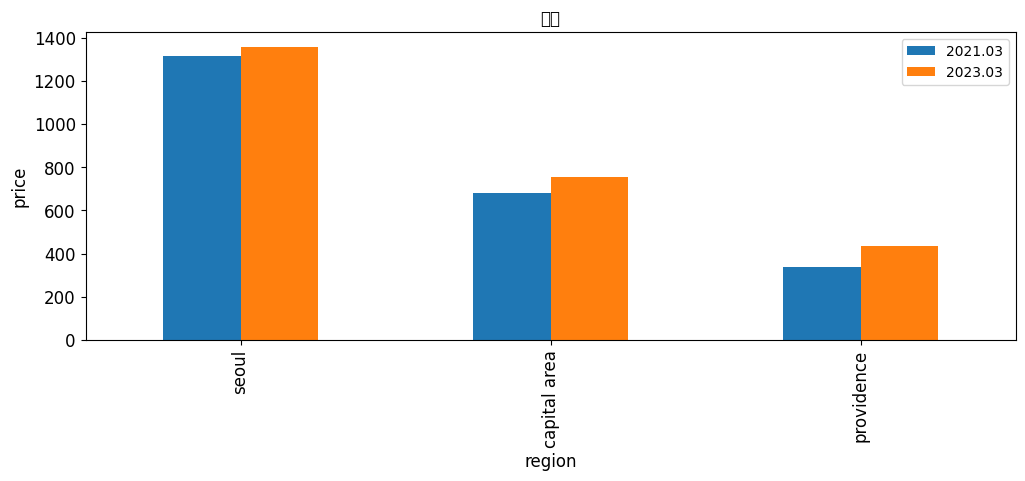

In [380]:
ax = aptAvgPrice_edit.plot(kind='bar', title='날씨', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('region', fontsize=12)          # x축 정보 표시
ax.set_ylabel('price', fontsize=12)     # y축 정보 표시
ax.set_xticklabels(['seoul','capital area', 'providence'], fontsize=12)

[Text(0, 0, 'seoul'), Text(1, 0, 'capital area'), Text(2, 0, 'providence')]

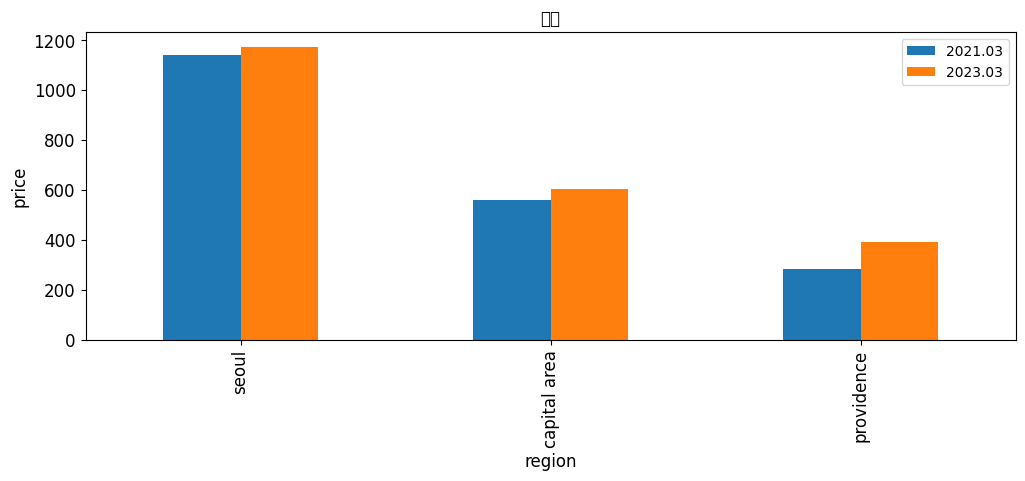

In [381]:
ax = aptMidPrice_edit.plot(kind='bar', title='날씨', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('region', fontsize=12)          # x축 정보 표시
ax.set_ylabel('price', fontsize=12)     # y축 정보 표시
ax.set_xticklabels(['seoul','capital area', 'providence'], fontsize=12)

[Text(0, 0, 'seoul'), Text(1, 0, 'capital area'), Text(2, 0, 'providence')]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50472 (\N{HANGUL SYLLABLE SSI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50472 (\N{HANGUL SYLLABLE SSI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


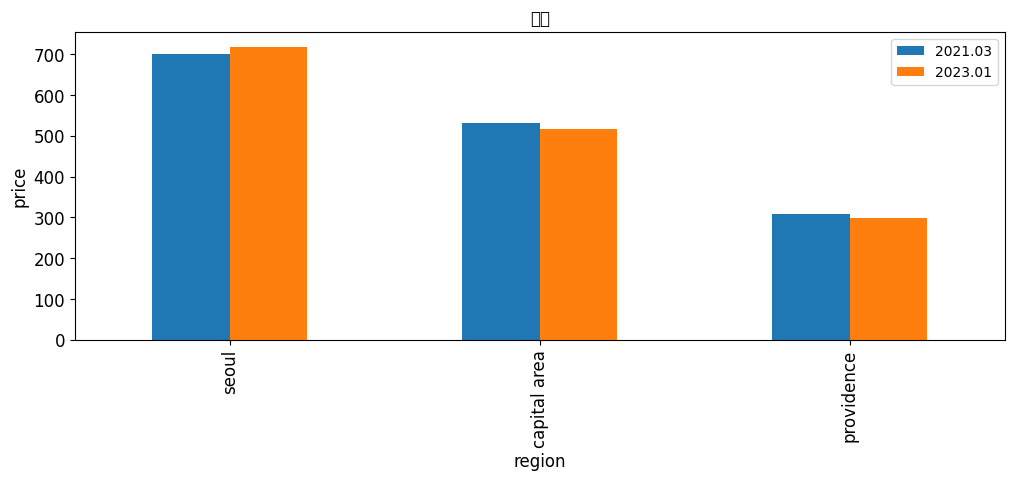

In [385]:
ax = aptAvgRentPrice_edit.plot(kind='bar', title='날씨', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('region', fontsize=12)          # x축 정보 표시
ax.set_ylabel('price', fontsize=12)     # y축 정보 표시
ax.set_xticklabels(['seoul','capital area', 'providence'], fontsize=12)

[Text(0, 0, 'seoul'), Text(1, 0, 'capital area'), Text(2, 0, 'providence')]

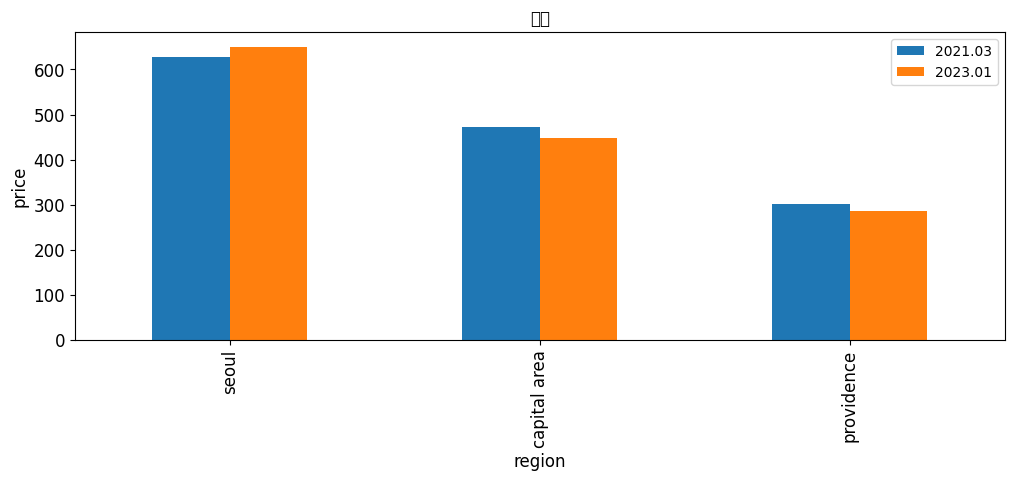

In [383]:
ax = aptMidRentPrice_edit.plot(kind='bar', title='날씨', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('region', fontsize=12)          # x축 정보 표시
ax.set_ylabel('price', fontsize=12)     # y축 정보 표시
ax.set_xticklabels(['seoul','capital area', 'providence'], fontsize=12)